In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/master.csv')
print(df.head())
print(df.info())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [44]:
# The data types are ensured to be correct
df['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')
df['population'] = pd.to_numeric(df['population'], errors='coerce')
df['gdp_per_capita ($)'] = pd.to_numeric(df['gdp_per_capita ($)'], errors='coerce')
df['suicides/100k pop'] = pd.to_numeric(df['suicides/100k pop'], errors='coerce')

# Missing values are checked
print(df.isnull().sum())

#  Rows with missing essential information (such as population or suicides_no) are removed
df = df.dropna(subset=['suicides_no', 'population', 'suicides/100k pop'])

# Missing values in economic or social columns are filled if needed (depending on the plan)
# For example, if HDI for year is important, its missing values could be filled with the mean
# df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].mean())

# Outliers are removed (such as population <= 0)
df = df[df['population'] > 0]
df = df[df['suicides_no'] >= 0]

# Extra spaces are removed from country and category names if present
df['country'] = df['country'].str.strip()
df['age'] = df['age'].str.strip()
df['sex'] = df['sex'].str.strip()

# The data structure after cleaning is reviewed
print(df.info())
print(df.head())


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9 

In [52]:
# A dictionary mapping countries to continents is created
continent_mapping = {
    'Albania': 'Europe', 'Algeria': 'Africa', 'Argentina': 'South America',
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe',
    'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa',
    'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Congo': 'Africa', 'Costa Rica': 'North America',
    'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Dominican Republic': 'North America',
    'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
    'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe',
    'Georgia': 'Asia', 'Germany': 'Europe', 'Greece': 'Europe',
    'Guatemala': 'North America', 'Guyana': 'South America', 'Honduras': 'North America',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia',
    'Indonesia': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia',
    'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa',
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Latvia': 'Europe',
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe',
    'Mauritius': 'Africa', 'Mexico': 'North America', 'Mongolia': 'Asia',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Nepal': 'Asia',
    'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nicaragua': 'North America',
    'Norway': 'Europe', 'Pakistan': 'Asia', 'Panama': 'North America',
    'Paraguay': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Qatar': 'Asia', 'Republic of Korea': 'Asia',
    'Romania': 'Europe', 'Russia': 'Europe/Asia', 'Saudi Arabia': 'Asia',
    'Serbia': 'Europe', 'Singapore': 'Asia', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'South Africa': 'Africa', 'Spain': 'Europe',
    'Sri Lanka': 'Asia', 'Suriname': 'South America', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Thailand': 'Asia', 'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa', 'Turkey': 'Europe/Asia', 'Turkmenistan': 'Asia',
    'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe',
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
    'Venezuela': 'South America', 'Vietnam': 'Asia', 'Zimbabwe': 'Africa'
}

# The continent mapping is applied to the dataset
df['Continent'] = df['country'].map(continent_mapping)

# Missing values are filled as 'Other'
df['Continent'] = df['Continent'].fillna('Other')

# The result is displayed
print(df[['country', 'Continent']].head())


   country Continent
0  Albania    Europe
1  Albania    Europe
2  Albania    Europe
3  Albania    Europe
4  Albania    Europe


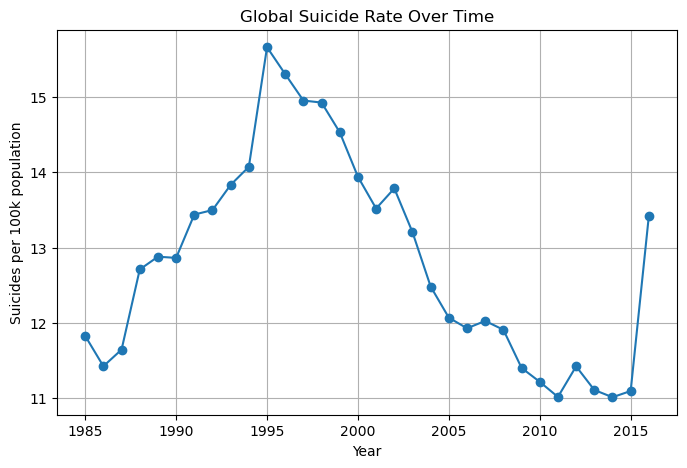

In [7]:
# The global suicide rate trend over the years is analyzed
df.groupby('year')['suicides/100k pop'].mean().plot(figsize=(8,5), marker='o')
plt.title('Global Suicide Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k population')
plt.grid(True)
plt.show()

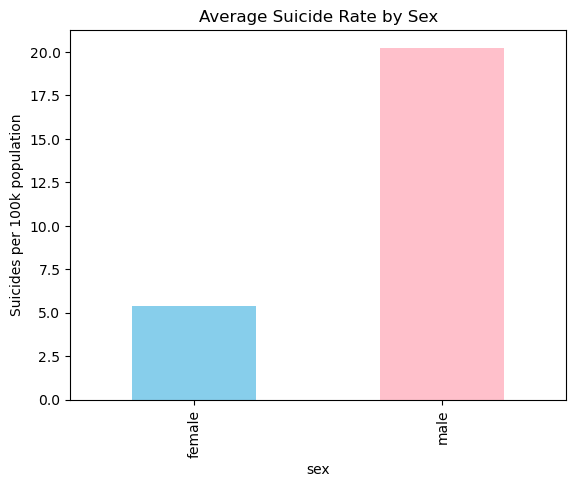

In [9]:
# The suicide rate between genders is compared globally
df.groupby('sex')['suicides/100k pop'].mean().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Average Suicide Rate by Sex')
plt.ylabel('Suicides per 100k population')
plt.show()

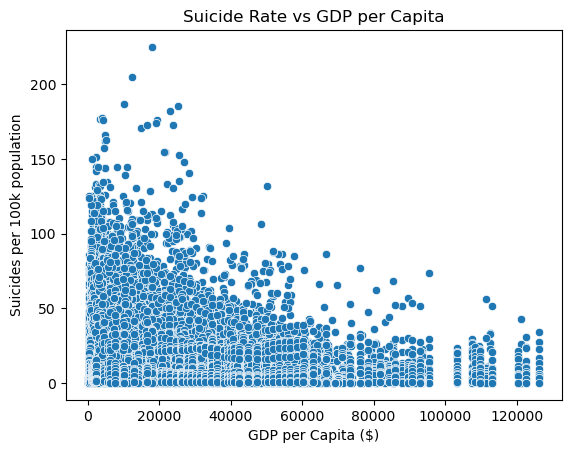

In [11]:
# The relationship between the suicide rate and GDP per capita is analyzed
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)
plt.title('Suicide Rate vs GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k population')
plt.show()

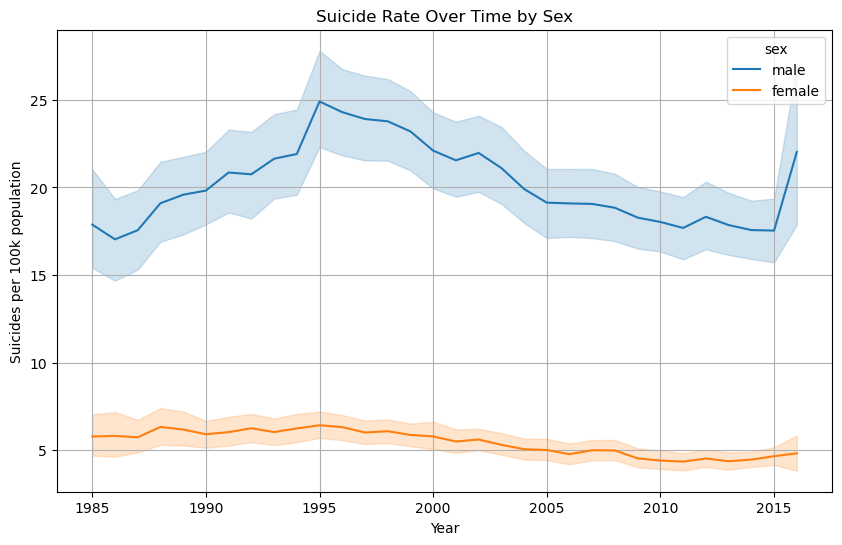

In [13]:
# The trend of the suicide rate by gender over the years is analyzed
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='suicides/100k pop', hue='sex', data=df)
plt.title('Suicide Rate Over Time by Sex')
plt.ylabel('Suicides per 100k population')
plt.xlabel('Year')
plt.grid(True)
plt.show()

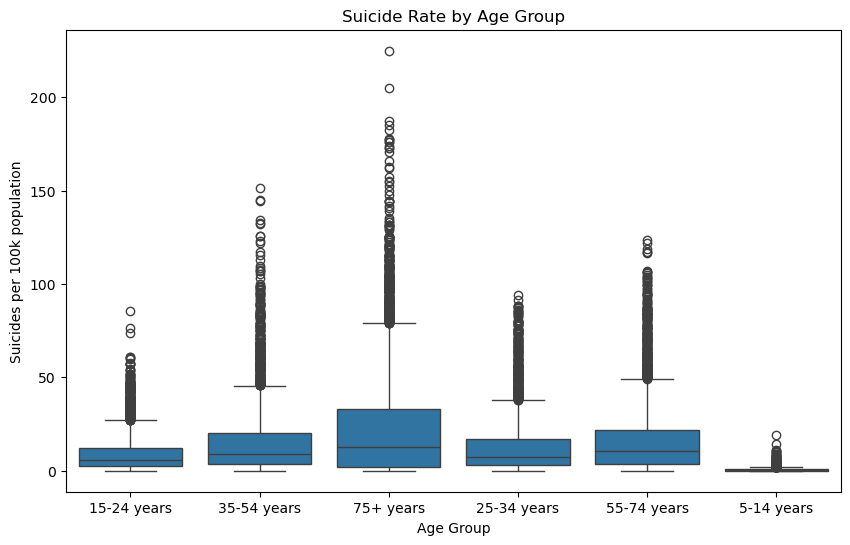

In [17]:
# The suicide rate by age group is compared
plt.figure(figsize=(10,6))
sns.boxplot(x='age', y='suicides/100k pop', data=df)
plt.title('Suicide Rate by Age Group')
plt.ylabel('Suicides per 100k population')
plt.xlabel('Age Group')
plt.show()

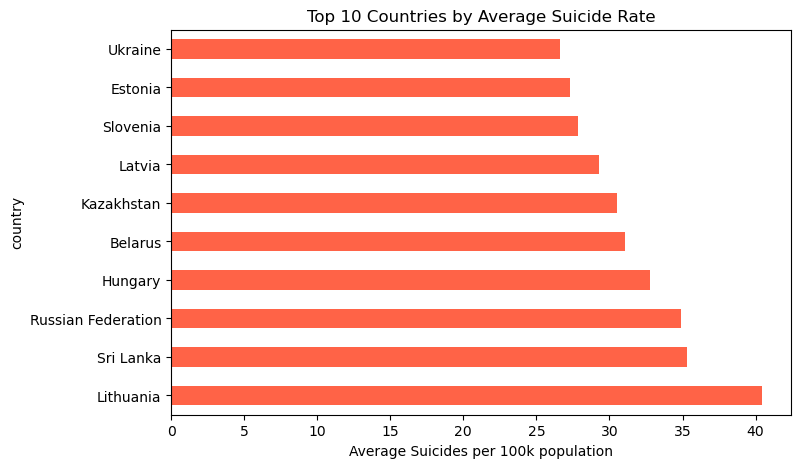

In [19]:
# The top 10 countries with the highest average suicide rate over the years are identified
top10_countries = df.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False).head(10)
top10_countries.plot(kind='barh', figsize=(8,5), color='tomato')
plt.title('Top 10 Countries by Average Suicide Rate')
plt.xlabel('Average Suicides per 100k population')
plt.show()

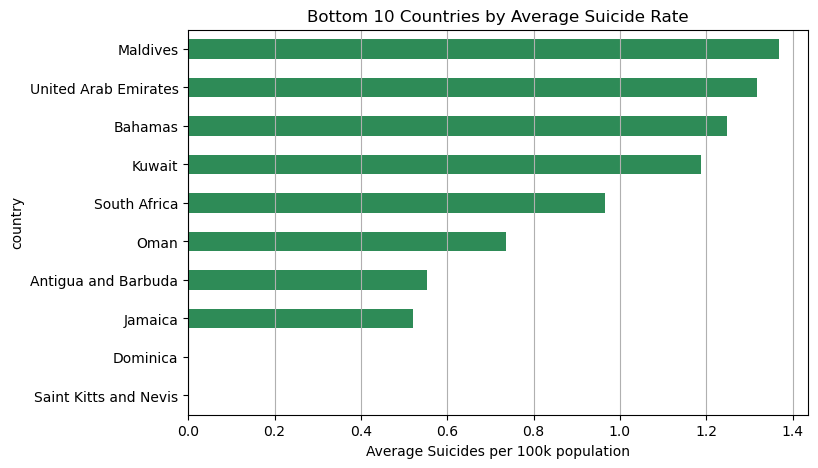

In [21]:
# The bottom 10 countries with the lowest average suicide rate over the years are identified
lowest10_countries = df.groupby('country')['suicides/100k pop'].mean().sort_values().head(10)
lowest10_countries.plot(kind='barh', figsize=(8,5), color='seagreen')
plt.title('Bottom 10 Countries by Average Suicide Rate')
plt.xlabel('Average Suicides per 100k population')
plt.grid(axis='x')
plt.show()

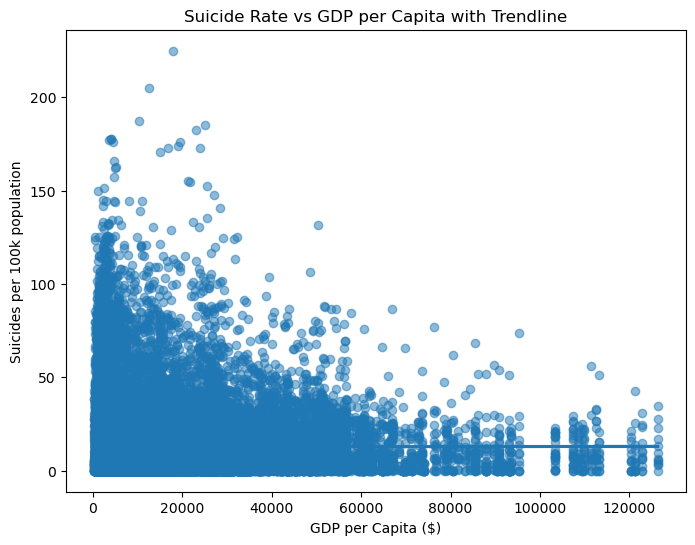

In [23]:
# The relationship between the suicide rate and GDP per capita is visualized with a regression line
plt.figure(figsize=(8,6))
sns.regplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df, scatter_kws={'alpha':0.5})
plt.title('Suicide Rate vs GDP per Capita with Trendline')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k population')
plt.show()

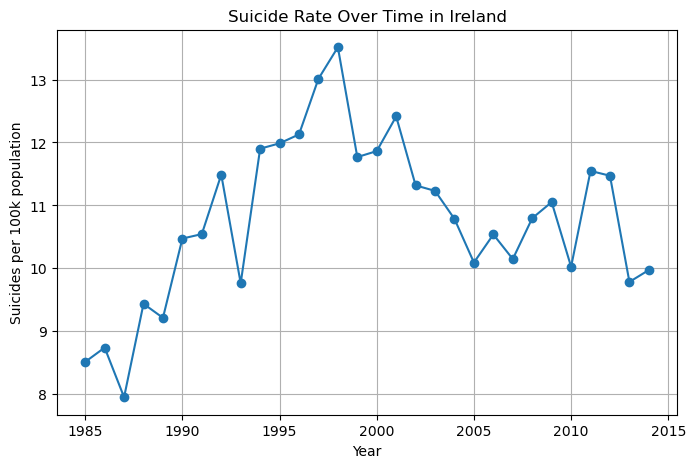

In [29]:
# The suicide rate trend over the years in a specific country (Ireland) is analyzed
country_name = 'Ireland'
ireland_data = df[df['country'] == country_name]
ireland_data.groupby('year')['suicides/100k pop'].mean().plot(figsize=(8,5), marker='o')
plt.title(f'Suicide Rate Over Time in {country_name}')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k population')
plt.grid(True)
plt.show()

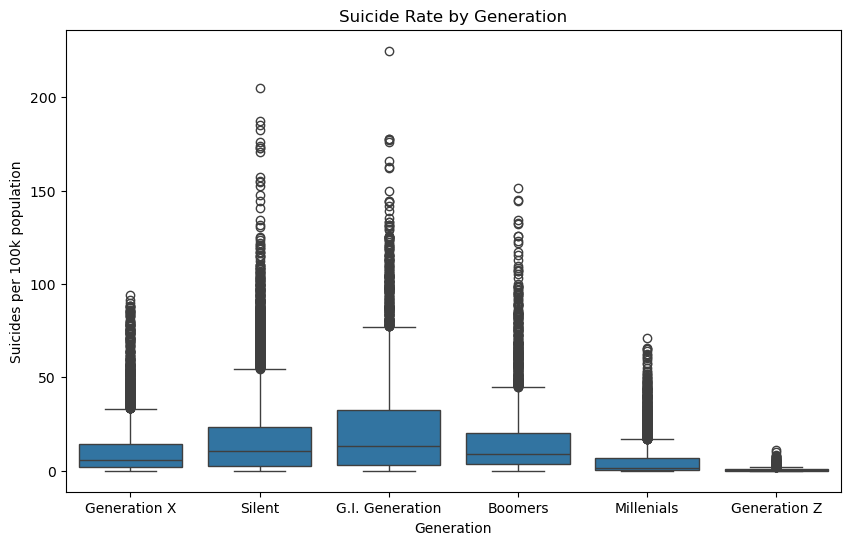

In [33]:
# The suicide rate is analyzed by generation
plt.figure(figsize=(10,6))
sns.boxplot(x='generation', y='suicides/100k pop', data=df)
plt.title('Suicide Rate by Generation')
plt.ylabel('Suicides per 100k population')
plt.xlabel('Generation')
plt.show()

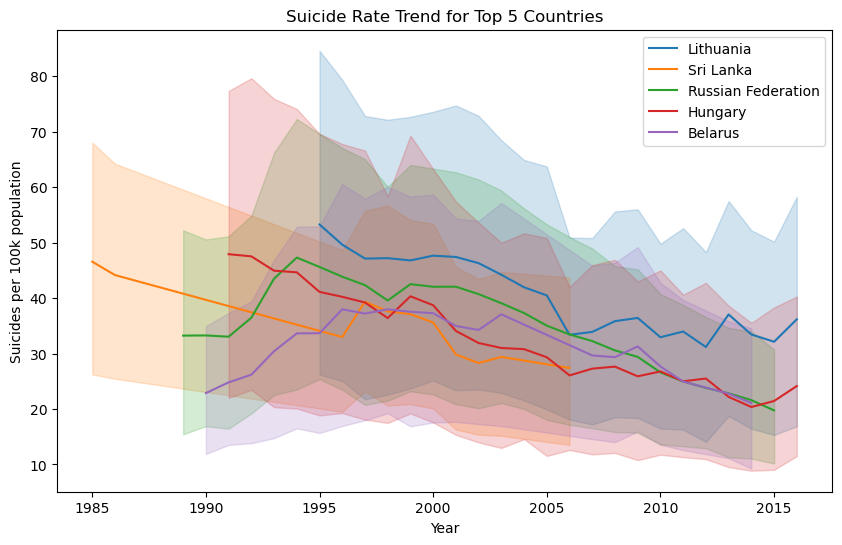

In [38]:
# The annual change in suicide rates for the countries with the highest rates is analyzed
top_countries = df.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False).head(5).index
plt.figure(figsize=(10,6))
for country in top_countries:
    subset = df[df['country'] == country]
    sns.lineplot(x='year', y='suicides/100k pop', data=subset, label=country)
plt.title('Suicide Rate Trend for Top 5 Countries')
plt.ylabel('Suicides per 100k population')
plt.xlabel('Year')
plt.legend()
plt.show()

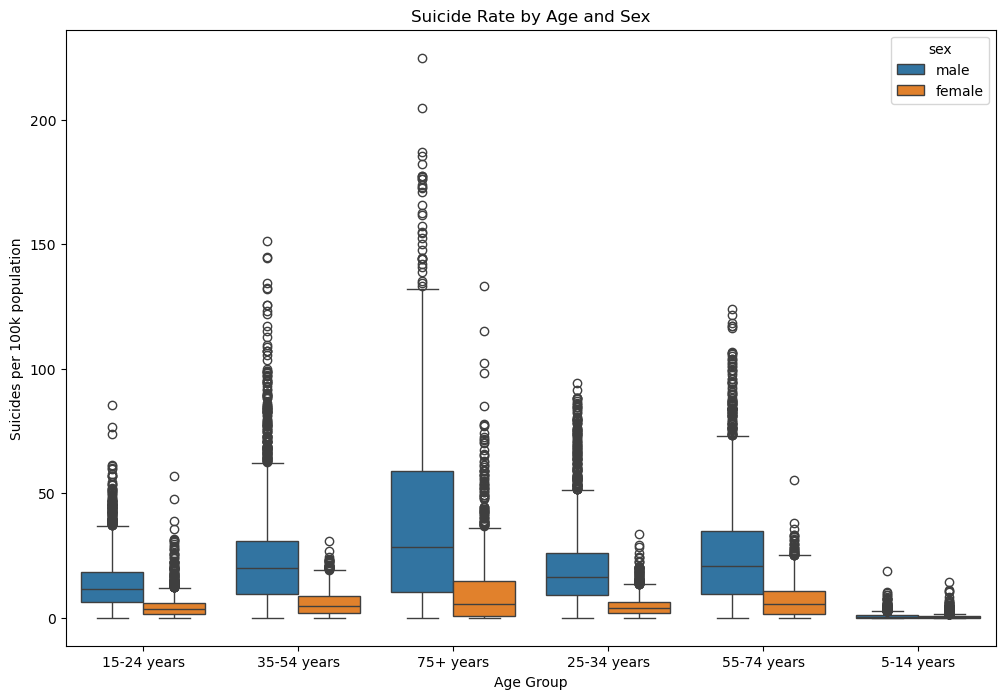

In [40]:
# The relationship between the suicide rate and both gender and age group is analyzed
plt.figure(figsize=(12,8))
sns.boxplot(x='age', y='suicides/100k pop', hue='sex', data=df)
plt.title('Suicide Rate by Age and Sex')
plt.ylabel('Suicides per 100k population')
plt.xlabel('Age Group')
plt.show()

In [50]:
# The cumulative suicide rates for the countries are calculated
total_suicides = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False)
print(total_suicides.head(25))

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Thailand               110643
Canada                 107561
Kazakhstan             101546
Spain                  100202
Argentina               82219
Hungary                 73891
Romania                 72777
Australia               70111
Belgium                 62761
Belarus                 59892
Sri Lanka               55641
Colombia                53080
Netherlands             50833
Name: suicides_no, dtype: int64


In [58]:
# The average suicide rate for each continent over the years is calculated
continent_avg = df.groupby('Continent')['suicides/100k pop'].mean().sort_values(ascending=False)
print(continent_avg)

Continent
Europe           17.012629
Oceania          13.680410
South America    11.428745
Asia             11.355006
Other             8.856035
North America     8.145457
Africa            7.549952
Europe/Asia       2.371071
Name: suicides/100k pop, dtype: float64


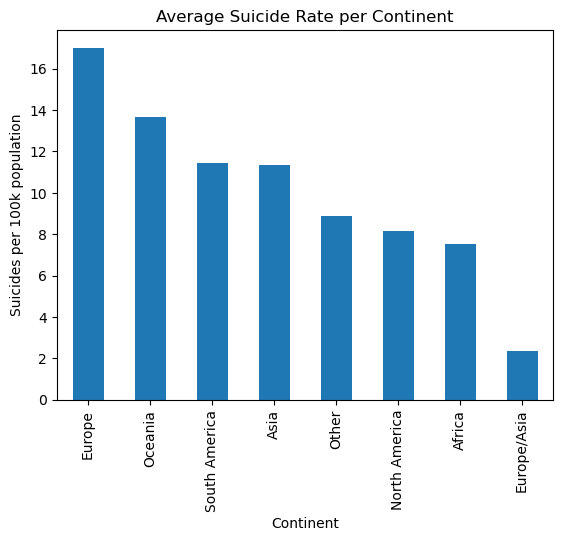

In [60]:
continent_avg.plot(kind='bar', title='Average Suicide Rate per Continent')
plt.ylabel('Suicides per 100k population')
plt.show()

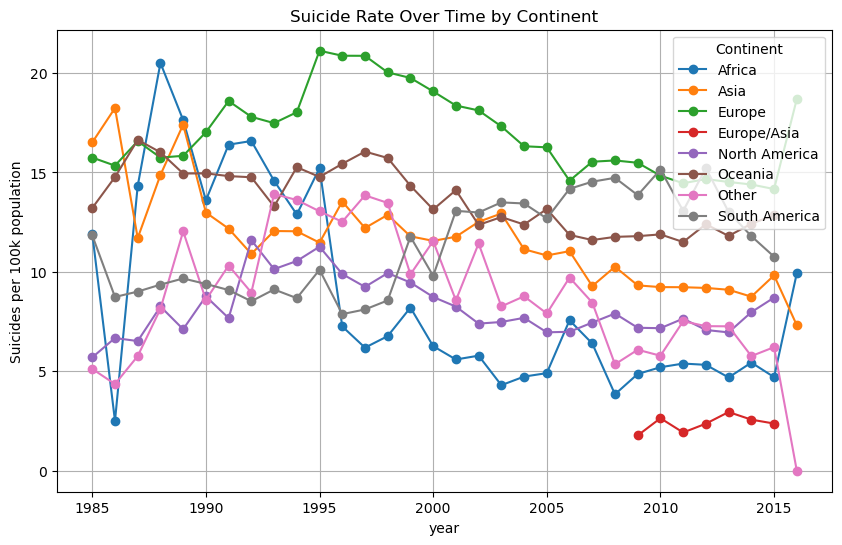

In [64]:
# The suicide rate trend over time for each continent is analyzed
continent_year = df.groupby(['year', 'Continent'])['suicides/100k pop'].mean().unstack()
continent_year.plot(figsize=(10,6), marker='o', title='Suicide Rate Over Time by Continent')
plt.ylabel('Suicides per 100k population')
plt.grid(True)
plt.show()

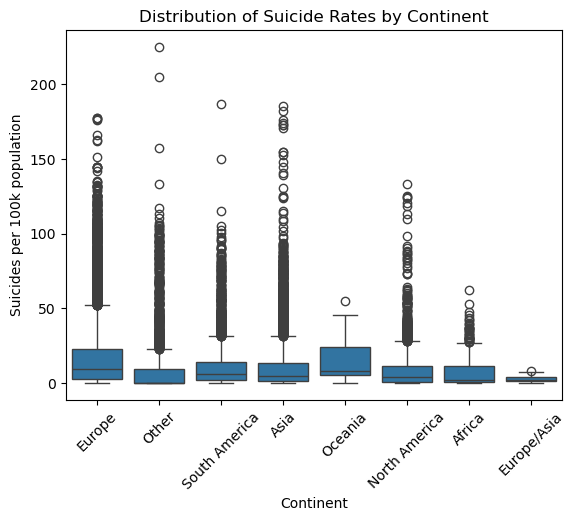

In [54]:
# A boxplot is created to compare suicide rates between continents
sns.boxplot(x='Continent', y='suicides/100k pop', data=df)
plt.title('Distribution of Suicide Rates by Continent')
plt.ylabel('Suicides per 100k population')
plt.xticks(rotation=45)
plt.show()

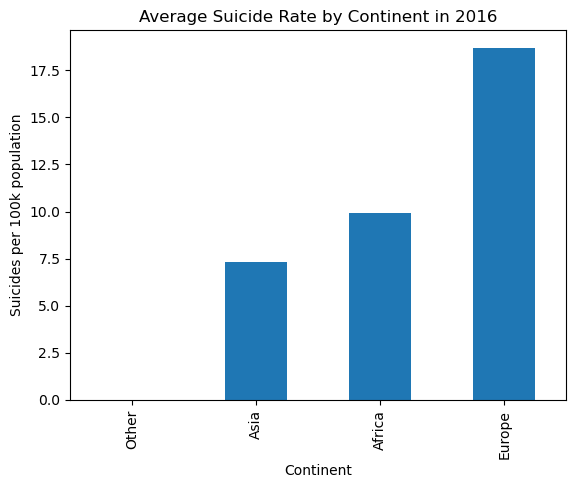

In [70]:
# The highest and lowest continents in terms of suicide rate in the latest year (2016) are identified
avg_2016.plot(kind='bar', title='Average Suicide Rate by Continent in 2016')
plt.ylabel('Suicides per 100k population')
plt.show()

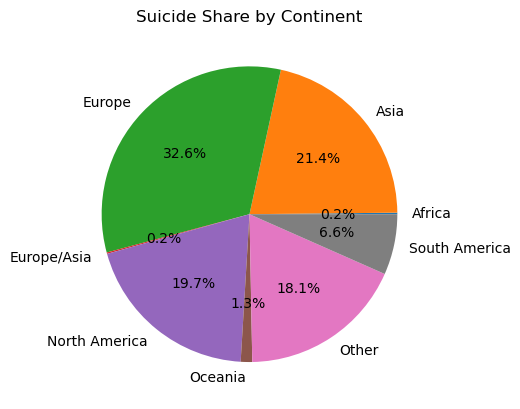

In [68]:
# The contribution percentage of each continent to the total number of suicides is calculated
suicide_share = df.groupby('Continent')['suicides_no'].sum()
suicide_share.plot(kind='pie', autopct='%1.1f%%', title='Suicide Share by Continent')
plt.ylabel('')
plt.show()

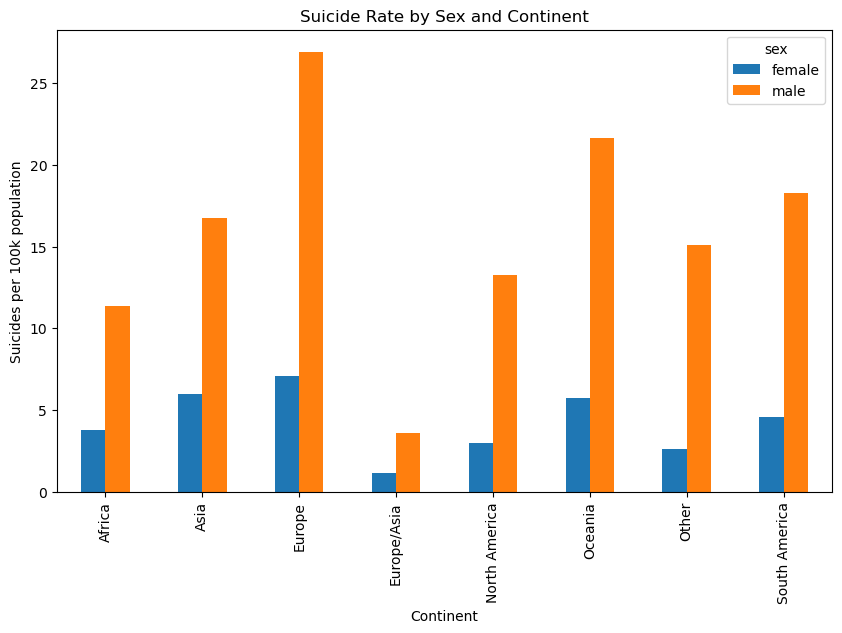

In [74]:
# The suicide rates by gender across continents are compared
sex_continent = df.groupby(['Continent', 'sex'])['suicides/100k pop'].mean().unstack()
sex_continent.plot(kind='bar', figsize=(10,6), title='Suicide Rate by Sex and Continent')
plt.ylabel('Suicides per 100k population')
plt.show()